### Student Information
Name: 許博傑

Student ID:106061620

GitHub ID:

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

In [1]:
### Begin Assignment Here!
# load the necessary library
%load_ext autoreload
%autoreload 2
import nltk
import helpers.data_mining_helpers as dmh
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Part 1: Take home exercise
# Exercise 1(take home):
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [2]:
from sklearn.datasets import fetch_20newsgroups
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

# Answer here
for i in range(5):
    print('\n'.join(twenty_train.data[i].split('\n')))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

# Exercise 2(take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
# Answer here
# diferent method to select data
X.ix[0:10:, 'category_name']

C:\Users\BJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


0              comp.graphics
1              comp.graphics
2     soc.religion.christian
3     soc.religion.christian
4     soc.religion.christian
5     soc.religion.christian
6     soc.religion.christian
7                    sci.med
8                    sci.med
9                    sci.med
10    soc.religion.christian
Name: category_name, dtype: object

# Exercise 3(take home):
Try to fecth records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [4]:
# Answer here
A = X[X['category_name'].isin(['sci.med'])]
A.loc[::10,:][:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


# Exercise 4(take home):
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [5]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

# Exercise 5(take home):
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [6]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print(NA_df)

  id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F                


In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Exercise 6(take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [8]:
#index無序

# Exercise 7(take home):
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

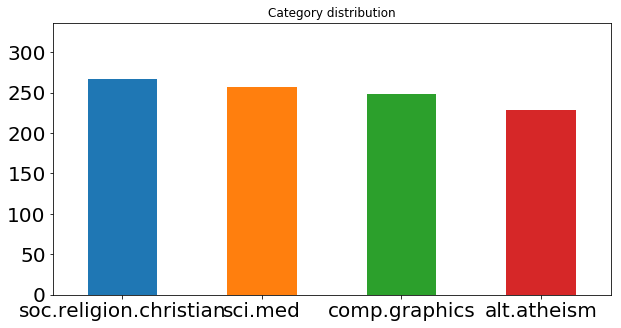

In [9]:
# Answer here
# use the biggest times of the categories then plus 50 as the ylim 
X_sample = X.sample(n=1000)
y_max = max(X_sample.category_name.value_counts().values)+69
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, y_max], 
                                           rot = 0, fontsize = 20, figsize = (10,5))

# Exercise 8(take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

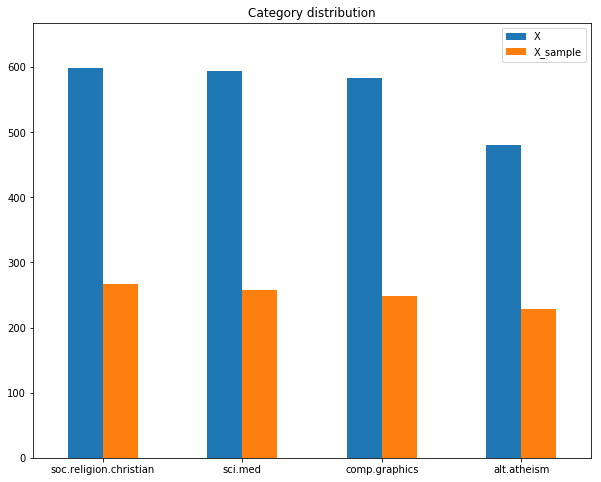

In [10]:
# Answer here
# use barplot to show the data and the sample data
index = X_sample.category_name.value_counts().index
X1 = X.category_name.value_counts().values
X2 = X_sample.category_name.value_counts().values
p = pd.DataFrame({'X': X1,'X_sample': X2}, index=index)
y_max = max(X1)+69
p.plot.bar(title = 'Category distribution', ylim = [0, y_max], rot=0, figsize = (10,8))

# Exercise 9(take home):
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [11]:
# build the transformer of word2vector
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
# bulid the analyzer of word2vector
analyze = count_vect.build_analyzer()
analyze("Hello World!")
A = " ".join(list(X[0:1].text))
# Answer here
analyze(A)

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

# Exercise 10(take home):
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [12]:
# Answer here
# find the position of which is not zero and show the text
A = X_counts[0:5,0:100].toarray()
B = np.where(A == 1)
feature = count_vect.get_feature_names()[0:100]
print(feature[B[1][1]])

01


# Exercise 11(take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

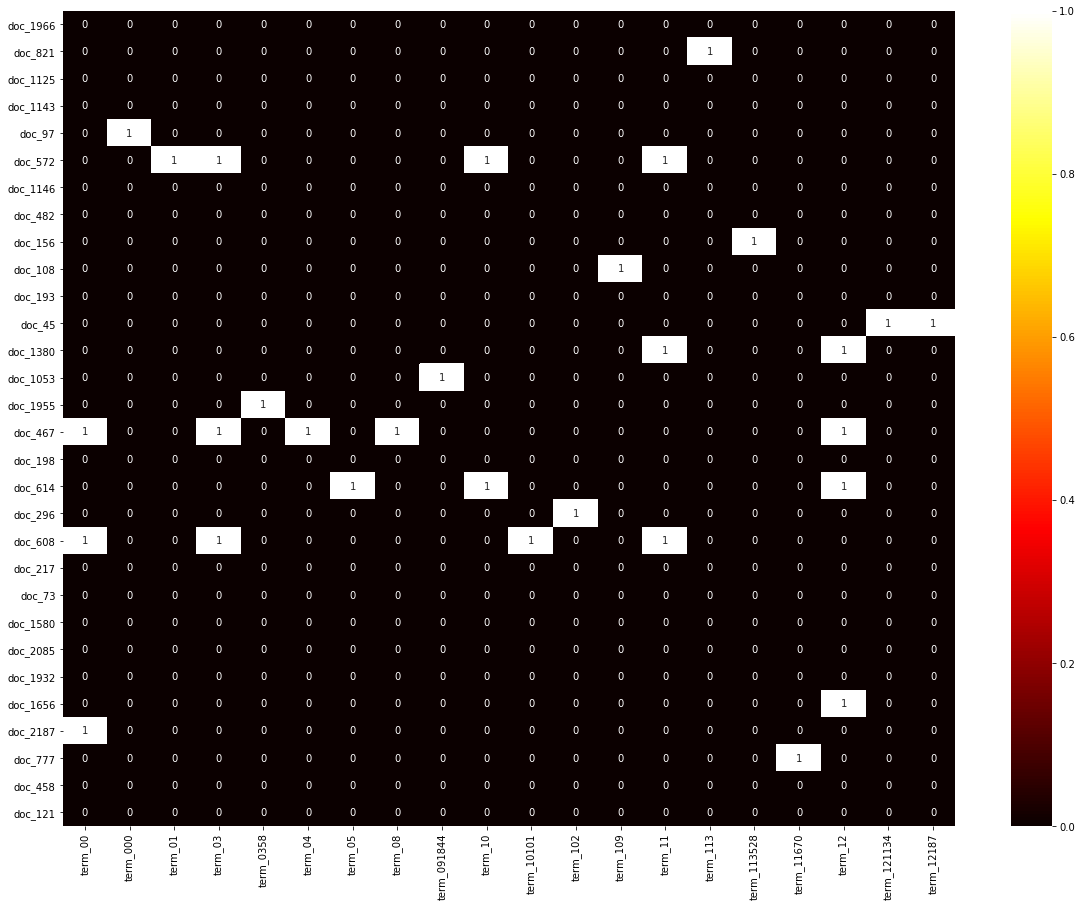

In [13]:
# Answer here
# use seaborn heatmap to draw the relation between the documents and the the features
import seaborn as sns
X_sample = X.sample(n=30)# sample thirty documents
count_vect_new = CountVectorizer()# build the transformer of word2vector of the 30 documents 
X_counts_new = count_vect_new.fit_transform(X_sample.text)
plot_x = ["term_"+str(i) for i in count_vect_new.get_feature_names()[0:20]]# the top twenty features
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)]# twenty random documents index
plot_z = X_counts_new[0:len(plot_y),0:len(plot_x)].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_todraw,
                 cmap="hot",
                 vmin=0, vmax=1, annot=True)

# Exercise 12(take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

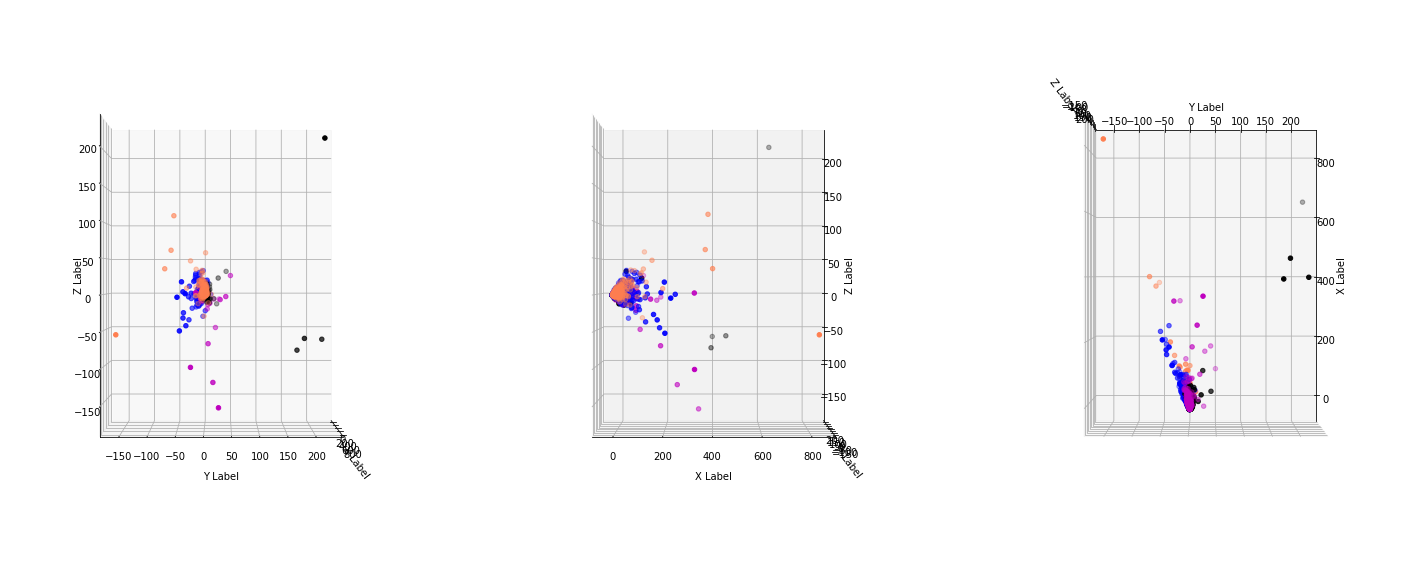

第二維度和第三維度沒有呈現正相關或負相關     	 第一維度和第三維度有呈現負相關    	  第一維度和第二維度有呈現負相關


In [14]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(131, projection='3d')
ax1 = fig.add_subplot(132, projection='3d')
ax2 = fig.add_subplot(133, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    #ax.plot(xs, ys, c = c, marker='o')
    #Y-Z
    ax.scatter(xs, ys, zs, s=20, c=c, depthshade=True)
    ax.view_init(0, 0)
    #X-Z
    ax1.scatter(xs, ys, zs, s=20, c=c, depthshade=True)
    ax1.view_init(0, -90)
    #X-Y
    ax2.scatter(xs, ys, zs, s=20, c=c, depthshade=True)
    ax2.view_init(-90, 0)
    
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
plt.show()

print("第二維度和第三維度沒有呈現正相關或負相關     \t 第一維度和第三維度有呈現負相關    \t  第一維度和第二維度有呈現負相關")


# Exercise 13(take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [15]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
# Answer here
# use plotly to draw the top 500(10000~10500)
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as of
from plotly import tools
# of.offline.init_notebook_mode(connected=True)
tools.set_credentials_file(username='ee402490', api_key='1EX9ILJL2I1HbPtGfdTk')
list_1 = [term_frequencies[i] for i in range(10000,10100)]
list_2 = [count_vect.get_feature_names()[i] for i in range(10000,10100)]
data = [go.Bar(x=list_2,y=list_1)]

py.iplot(data)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ee402490/0 or inside your plot.ly account where it is named 'plot from API'


# Exercise 14(take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [16]:
# Answer here
# select the text feature which appears over than ten times
x = term_frequencies
list_1 = [x[i] for i in range(len(count_vect.get_feature_names())) if x[i] > 10]
list_2 = []
for i in range(len(count_vect.get_feature_names())):
    if x[i] > 10:
        list_2.append(count_vect.get_feature_names()[i])
data = [go.Bar(x=list_2,y=list_1)]
py.iplot(data)

# Exercise 15(take home):
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [17]:
# Answer here
# arrange and show the long tail plot
dic = dict(zip(list_2,list_1))
dic_sort = sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
# dic_sort = sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
plt.figure(figsize = (10,8))
# plt.plot(range(len(dic_sort),0,-1),dic_sort[:,1])
a,b = zip(*dic_sort)
data = [go.Bar(x=a,y=b)]
py.iplot(data)

<Figure size 720x576 with 0 Axes>

# Exercise 16(take home):
Try to generate the binarization using the `category_name` column instead. Does it work?

In [18]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]
print("can't work")

can't work


C:\Users\BJ\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



# Part 2: New dataset(Lab1 operations)
# 1. Load data:
First, I input the three data and store them into dataframe. Then I merge them into one dataframe.

In [27]:
a = open('amazon_cells_labelled.txt')
df = pd.read_table(a, names=('sentence','score'))
df['source'] = 'amazon'
b = open('imdb_labelled.txt',encoding = 'utf8')
b = pd.read_table(b, names=('sentence','score'))
b['source'] = 'imdb'
c = open('yelp_labelled.txt')
c = pd.read_table(c, names=('sentence','score'))
c['source'] = 'yelp'
df = pd.concat([df, b, c], axis=0)
print(df)

                                              sentence  score  source
0    So there is no way for me to plug it in here i...      0  amazon
1                          Good case, Excellent value.      1  amazon
2                               Great for the jawbone.      1  amazon
3    Tied to charger for conversations lasting more...      0  amazon
4                                    The mic is great.      1  amazon
5    I have to jiggle the plug to get it to line up...      0  amazon
6    If you have several dozen or several hundred c...      0  amazon
7          If you are Razr owner...you must have this!      1  amazon
8                  Needless to say, I wasted my money.      0  amazon
9                     What a waste of money and time!.      0  amazon
10                     And the sound quality is great.      1  amazon
11   He was very impressed when going from the orig...      1  amazon
12   If the two were seperated by a mere 5+ ft I st...      0  amazon
13                  

# 2. part of data:

In [28]:
X= df[df['source'].isin(['yelp'])]
X.loc[::10,:][:10]

,sentence,score,source
0,Wow... Loved this place.,1,yelp
10,Service was very prompt.,1,yelp
20,The Burrittos Blah!,0,yelp
30,"Also there are combos like a burger, fries, an...",1,yelp
40,The shrimp tender and moist.,1,yelp
50,We ordered the duck rare and it was pink and t...,1,yelp
60,At least think to refill my water before I str...,0,yelp
70,"The deal included 5 tastings and 2 drinks, and...",1,yelp
80,Coming here is like experiencing an underwhelm...,0,yelp
90,"In summary, this was a largely disappointing d...",0,yelp


In [21]:
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
print(df)


                                              sentence  score  source  \
0    So there is no way for me to plug it in here i...      0  amazon   
1                          Good case, Excellent value.      1  amazon   
2                               Great for the jawbone.      1  amazon   
3    Tied to charger for conversations lasting more...      0  amazon   
4                                    The mic is great.      1  amazon   
5    I have to jiggle the plug to get it to line up...      0  amazon   
6    If you have several dozen or several hundred c...      0  amazon   
7          If you are Razr owner...you must have this!      1  amazon   
8                  Needless to say, I wasted my money.      0  amazon   
9                     What a waste of money and time!.      0  amazon   
10                     And the sound quality is great.      1  amazon   
11   He was very impressed when going from the orig...      1  amazon   
12   If the two were seperated by a mere 5+ ft I st

# 3. Check duplicate and null data then delete:

In [29]:
df.drop_duplicates(keep='first', inplace=True)
len(df)
df.index=range(0,len(df))

# 4. Sample the data:

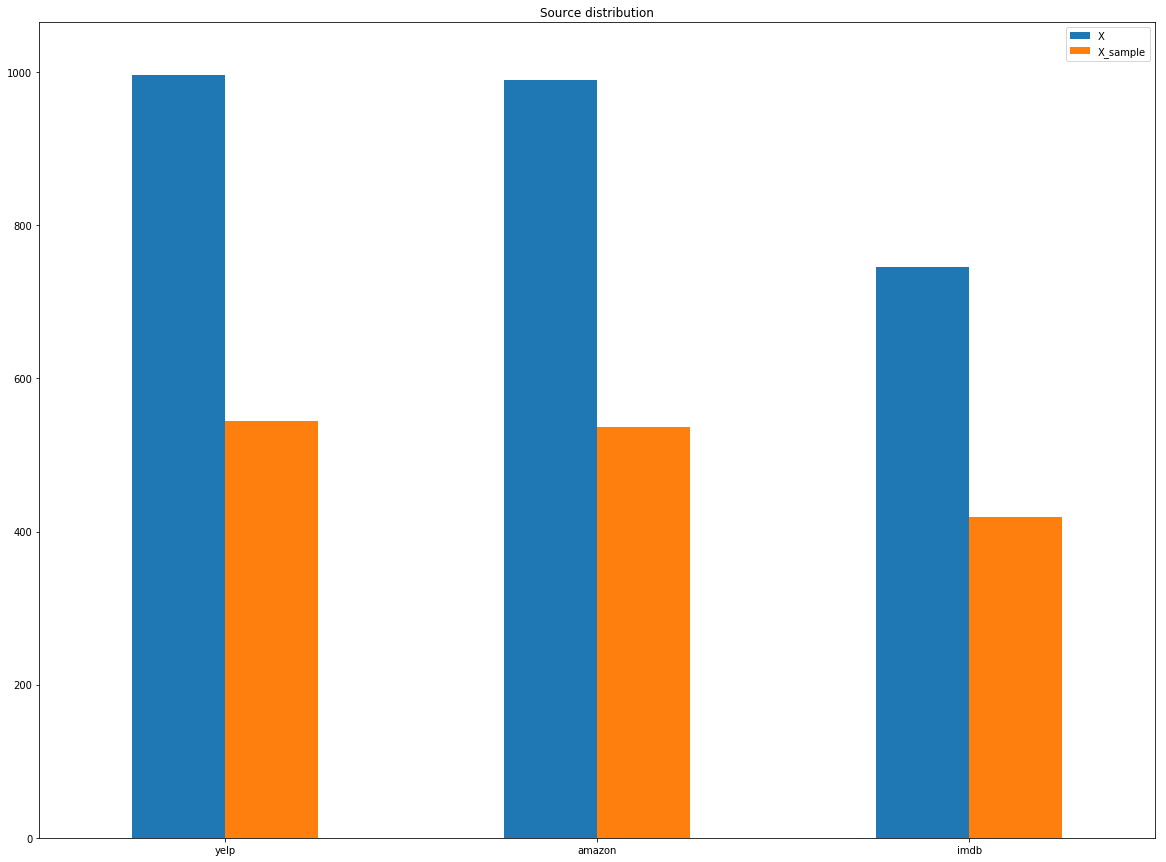

In [30]:
df_sample = df.sample(n=1500)
index = df_sample.source.value_counts().index
X1 = df.source.value_counts().values
X2 = df_sample.source.value_counts().values
p = pd.DataFrame({'X': X1,'X_sample': X2}, index=index)
y_max = max(X1)+69
p.plot.bar(title = 'Source distribution', ylim = [0, y_max], rot=0, figsize = (20,15))

# 5. Feature extraction:

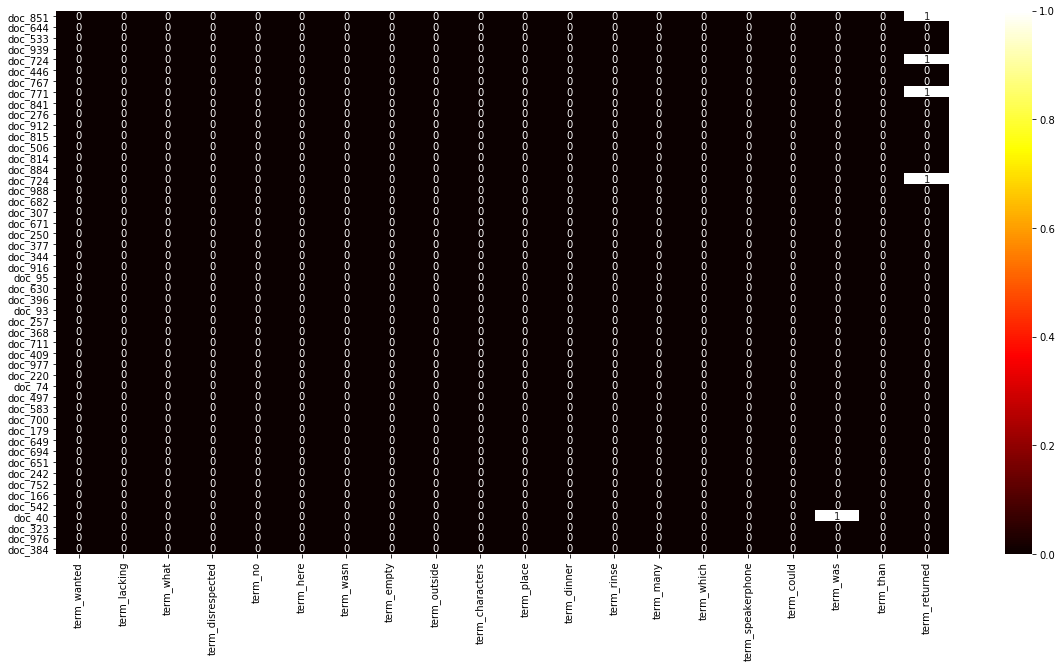

In [24]:
# build the transformer of word2vector
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
vectorizer = CountVectorizer()
df_counts = vectorizer.fit_transform(df.sentence)
df_counts
# bulid the analyzer of word2vector
analyzer = vectorizer.build_analyzer()
A = ''.join(list(df[df['source'].isin(['amazon'])].sentence))
analyzer(A)
df_counts[0:5,0:100].toarray()
# find the position of which is not zero and show the text
A = df_counts[0:5,0:100].toarray()
B = np.where(A == 1)
feature = vectorizer.get_feature_names()[0:100]
feature[B[1][0]]
# use seaborn heatmap to draw the relation between the documents and the the features
df_sample = df.sample(n=50)# sample 50 documents
vectorizer_new = CountVectorizer()# build the transformer of word2vector of the 30 documents 
df_counts_new = vectorizer_new.fit_transform(df_sample.sentence)
feature_new = vectorizer_new.get_feature_names()# get the sample data text features
x = np.random.choice(feature_new, 20)# sample 20 text features
ind_x = []
for w in x:
    ind_x.append(feature_new.index(w))
# twenty random features
plot_x = ["term_"+str(feature_new[i]) for i in ind_x]
# thirty random documents index
plot_y = ["doc_"+ str(i) for i in df_sample.index]
plot_z = df_counts[df_sample.index,:]
plot_z = plot_z[:,ind_x].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="hot",
                 vmin=0, vmax=1, annot=True)

# 6. Dimension reduction:
I show two different methods to reduce the dimension

 two dimensional PCA


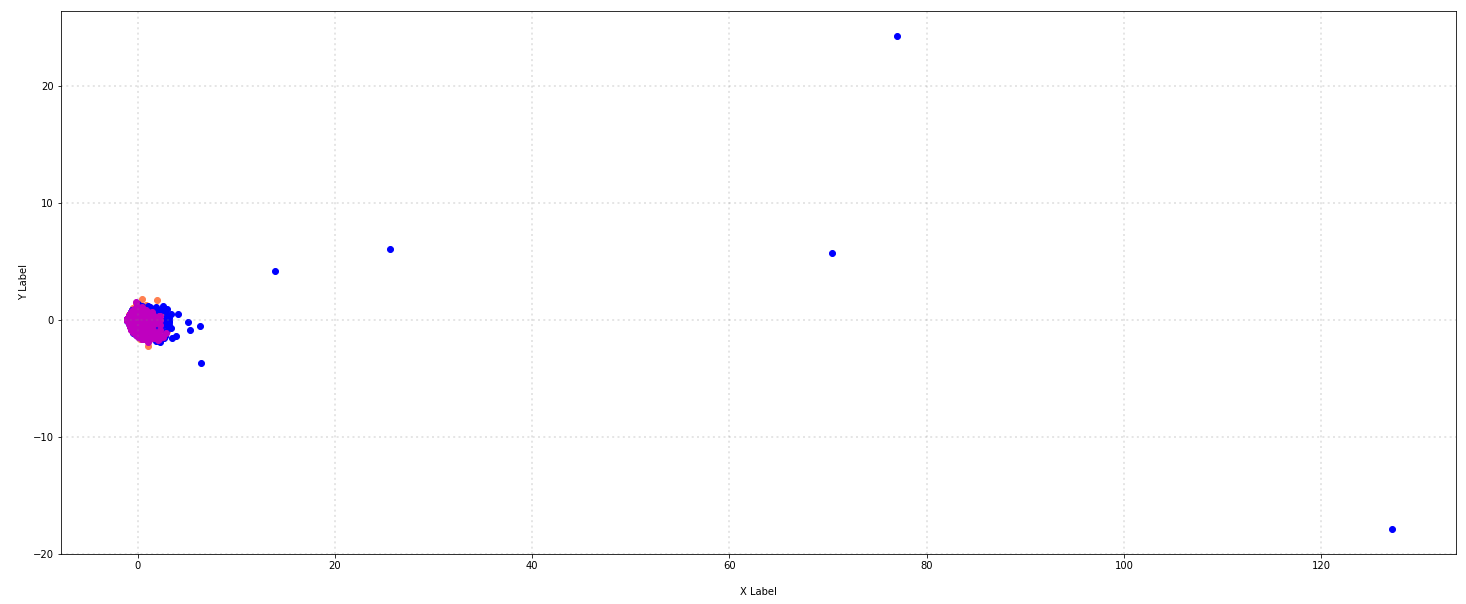

In [25]:

print(" two dimensional PCA")
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

col = ['coral', 'blue', 'm']
categories = ['amazon', 'imdb', 'yelp']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['source'] == category].T[0]
    ys = df_reduced[df['source'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


In [26]:
# calculate the appearnce times of every text feature in all documents
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies

array([ 1, 38,  3, ...,  1,  2,  1], dtype=int64)

In [31]:
# use plotly to draw the top 500
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as of
of.offline.init_notebook_mode(connected=True)

list_1 = [term_frequencies[i] for i in range(500)]
list_2 = [vectorizer.get_feature_names()[i] for i in range(500)]
data = [go.Bar(x=list_2,y=list_1)]

py.iplot(data)

# 7. Discretization and Binarization:

In [32]:
# use the score to do discretization and binarization
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.score)
mlb.classes_
df['bin_score'] = mlb.transform(df['score']).tolist()
df[0:15]

,sentence,score,source,bin_score
0,So there is no way for me to plug it in here i...,0,amazon,[0]
1,"Good case, Excellent value.",1,amazon,[1]
2,Great for the jawbone.,1,amazon,[1]
3,Tied to charger for conversations lasting more...,0,amazon,[0]
4,The mic is great.,1,amazon,[1]
5,I have to jiggle the plug to get it to line up...,0,amazon,[0]
6,If you have several dozen or several hundred c...,0,amazon,[0]
7,If you are Razr owner...you must have this!,1,amazon,[1]
8,"Needless to say, I wasted my money.",0,amazon,[0]
9,What a waste of money and time!.,0,amazon,[0]


# Part 3: New dataset & My new operations

# 1. different method of  visualization:

<Figure size 7200x7200 with 0 Axes>

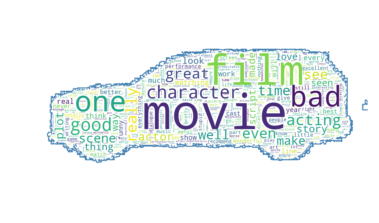

<Figure size 7200x7200 with 0 Axes>

In [36]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
text = open('imdb_labelled.txt',encoding = 'utf8').read()# read the 'imdb.txt'

dragon_cat_mask = np.array(Image.open('123.jpg'))# read the dragon_cat ficture

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=dragon_cat_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')# use the penguin as mask

wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize = (100,100))

#  2. TF-IDF features:

In [37]:
# calculate the TFIDF
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(df_counts).toarray()
transformer.idf_

array([8.22584531, 5.51779511, 7.53269813, ..., 8.22584531, 7.8203802 ,
       8.22584531])

# 3. Similarity:
I show five different methods of calculate the similarity.

In [40]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.metrics.pairwise import euclidean_distances as ed
from sklearn.metrics.pairwise import manhattan_distances as md
from sklearn.metrics import jaccard_similarity_score as jsc
from sklearn.neighbors import DistanceMetric

features = vectorizer.fit_transform(df.sentence).todense()
print(" Cosine similarity:")
rnd1 = round(random.random()*2713)# randomly select a document
cos = cs(tfidf[rnd1:rnd1+1], tfidf).flatten()# calculate the similarity between the document and others
related_docs_indices = cos.argsort()[:-7:-1] # arrange the similarity and select the top five
print(related_docs_indices)

print("Minkowski distance similarity:")
minkowski_dis = DistanceMetric.get_metric('minkowski')
mi_ls = []
for f in features:
    mi_ls.append(minkowski_dis.pairwise(features[rnd1], f))# calculate the similarity between the document and others
mi_ls = np.array(mi_ls)
related_docs_indices = mi_ls.flatten().argsort()[:6]# arrange the similarity and select the top five
print(related_docs_indices)

 Cosine similarity:
[2654  751 2188  337 1044 2369]
Minkowski distance similarity:
[2654 2238 1789 1807 2432 1322]


# 4. Naive Bayes classifier:

In [43]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# build the train model
def train(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
    classifier.fit(X_train, y_train)
    return classifier, X_test, y_test

# classifier with using TF-IDF features
trial1 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB(alpha=0.01))])
 
classifier, X_test, y_test = train(trial1, df.sentence, df.source)
print("Accuracy(use TF-IDF features): %s\n" % classifier.score(X_test, y_test))

print(metrics.classification_report(y_test, classifier.predict(X_test),target_names=['amazon', 'imdb', 'yelp']))
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))
print('')

# classifier with using word frequency features
trial2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB(alpha=0.03))])

classifier, X_test, y_test = train(trial2, df.sentence, df.source)
print("Accuracy(use word frequency features): %s\n" % classifier.score(X_test, y_test))

print(metrics.classification_report(y_test, classifier.predict(X_test),target_names=['amazon', 'imdb', 'yelp']))
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))

Accuracy(use TF-IDF features): 0.8521229868228404

             precision    recall  f1-score   support

     amazon       0.87      0.85      0.86       254
       imdb       0.84      0.83      0.84       196
       yelp       0.84      0.87      0.85       233

avg / total       0.85      0.85      0.85       683

[[216  14  24]
 [ 17 163  16]
 [ 14  16 203]]

Accuracy(use word frequency features): 0.8565153733528551

             precision    recall  f1-score   support

     amazon       0.89      0.84      0.87       254
       imdb       0.84      0.86      0.85       196
       yelp       0.84      0.87      0.85       233

avg / total       0.86      0.86      0.86       683

[[213  15  26]
 [ 13 169  14]
 [ 12  18 203]]


# THANK U